In [7]:
import numpy as np 
import pandas as pd
import cv2 
from matplotlib import pyplot as plt 
import matplotlib.cm as cm


import matplotlib.gridspec as gridspec
from pylab import imread
from skimage.color import rgb2gray

In [8]:
def show_images(*images):
    # Tạo một khung đồ thị với 1 hàng và số lượng hình ảnh cột
    fig, axs = plt.subplots(1, len(images), figsize=(5 * len(images), 5))

    # Nếu chỉ có một hình ảnh, axs sẽ không phải là một mảng
    # Do đó, chúng ta cần chuyển nó thành một mảng để có thể lặp qua nó
    if len(images) == 1:
        axs = [axs]

    # Show images
    for i, img in enumerate(images):
        # If image have less than 3 channels, show it in gray 
        if img.ndim < 3:
            axs[i].imshow(img, cmap='gray')
        else:
            axs[i].imshow(img)
        axs[i].set_title(f'Image {i+1}')

    plt.show()


# Bài 1


# Dilation - Tăng kích thước- đậm màu đối tượng trong ảnh

In [9]:
#Đọc ảnh
img1 = cv2.imread('C:/Users/trand/Documents/Digital Image Processing/data/img5.jpg')
#Chuyển đổi ảnh sang ảnh xám
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

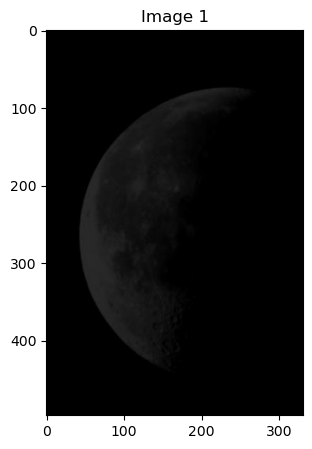

In [10]:
show_images(img1)

In [11]:
# Kernel cho các phép morphology
kernel = np.ones((2, 2), dtype = np.uint8)
kernel

array([[1, 1],
       [1, 1]], dtype=uint8)

In [12]:
#Phương pháp dilation
dilation = cv2.dilate(gray1, kernel, iterations=1) 

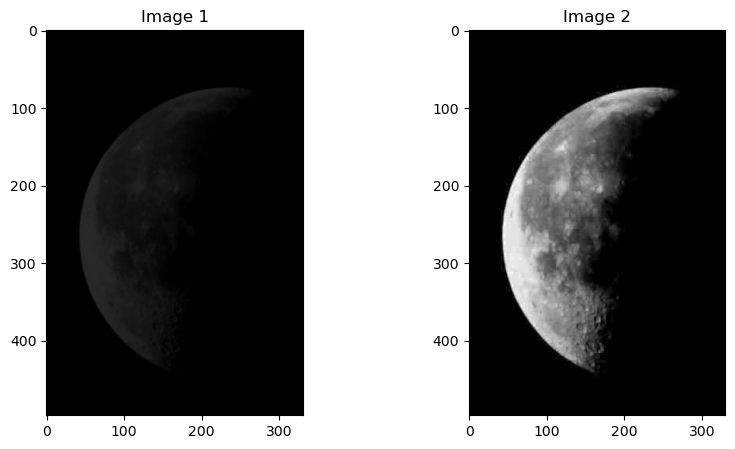

In [13]:
show_images(img1,dilation)

# Erosion - Giảm nhiễu  - tách biên các đối tượng gần nhau.


In [8]:
#Đọc ảnh
img2 = plt.imread('C:/Users/trand/Documents/Digital Image Processing/data/img6.jpg')
#Chuyển đổi ảnh sang ảnh xám
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

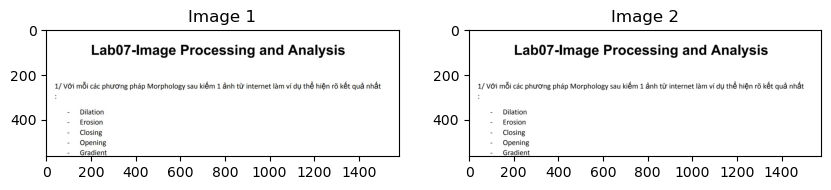

In [9]:
show_images(img2,gray2)


In [10]:
#gray2 = (gray2*255).astype(int)
gray2

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [11]:
#Phương pháp erosion
erosion = cv2.erode(gray2, kernel, iterations=1)

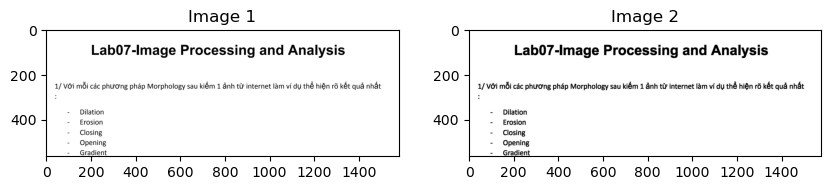

In [12]:
show_images(gray2,erosion)

# Opening - Xử lý ảnh bị nhiễu, giữ lại các đối tượng lớn.

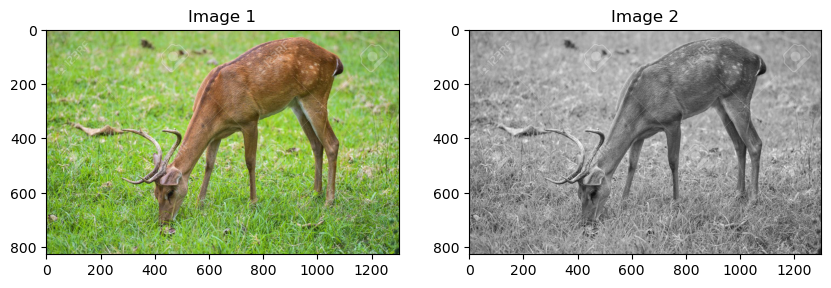

In [13]:
#Doc anh
img3 = plt.imread('C:/Users/trand/Documents/Digital Image Processing/data/img9.jpg')

#Chuyển đổi ảnh sang ảnh xám
gray3 = cv2.cvtColor(img3, cv2.COLOR_RGB2GRAY)

#Hien thi anh
show_images(img3,gray3)

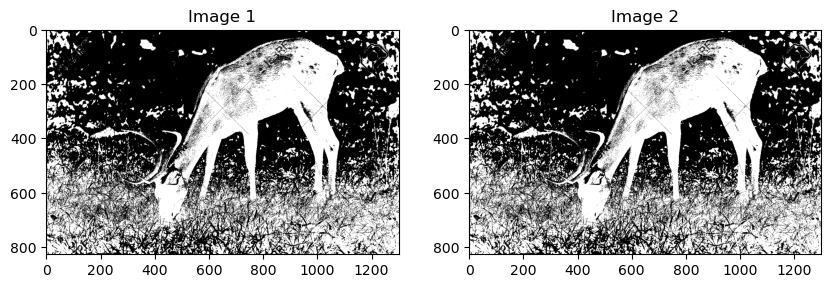

150.0


In [14]:
mask01 = (gray3 < 150).astype(np.uint8) * 255  # Change 0-1 to range 0-255
thresh, mask02 = cv2.threshold(gray3,150,255,cv2.THRESH_BINARY_INV)
show_images(mask01, mask02)
print(thresh)

In [15]:
white_noise = np.random.randint(low=0,high=2,size=mask02.shape)

In [16]:
white_noise = white_noise*255
white_noise

array([[255, 255,   0, ..., 255, 255, 255],
       [255,   0, 255, ...,   0,   0, 255],
       [  0,   0, 255, ..., 255,   0, 255],
       ...,
       [255, 255,   0, ...,   0, 255,   0],
       [  0, 255, 255, ..., 255, 255,   0],
       [255,   0, 255, ..., 255, 255, 255]])

In [17]:
#Thêm nhiễu vào ảnh
noise_img = white_noise+mask02

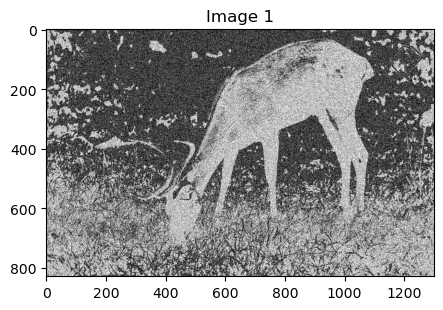

In [18]:
show_images(noise_img)

In [19]:
noise_img = noise_img.astype(np.uint8)
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

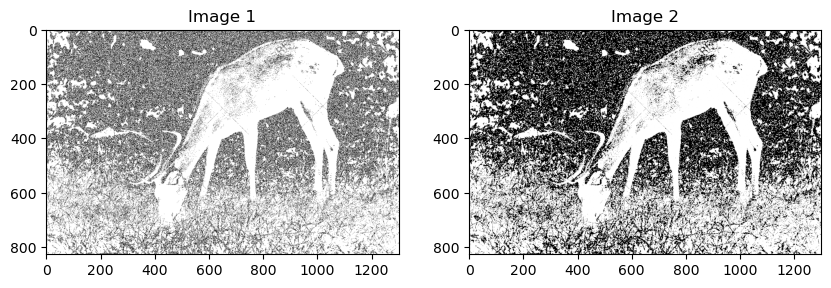

In [20]:
show_images(noise_img,opening)

# Gradient 
Làm rõ viền 

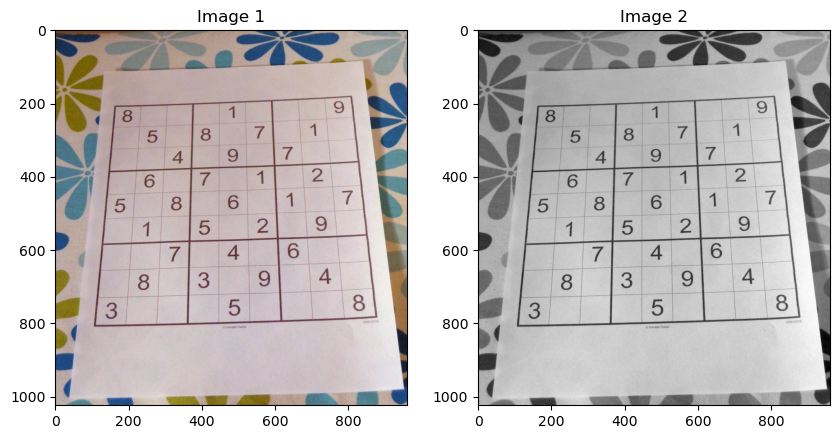

In [21]:
img5 = plt.imread("C:/Users/trand/Documents/Digital Image Processing/data/img8.jpg")

gray5 = cv2.cvtColor(img5, cv2.COLOR_RGB2GRAY)

show_images(img5,gray5)

In [22]:
sobelx = cv2.Sobel(gray5,cv2.CV_64F,1,0, ksize = 5)
sobely = cv2.Sobel(gray5,cv2.CV_64F,0,1, ksize = 5)


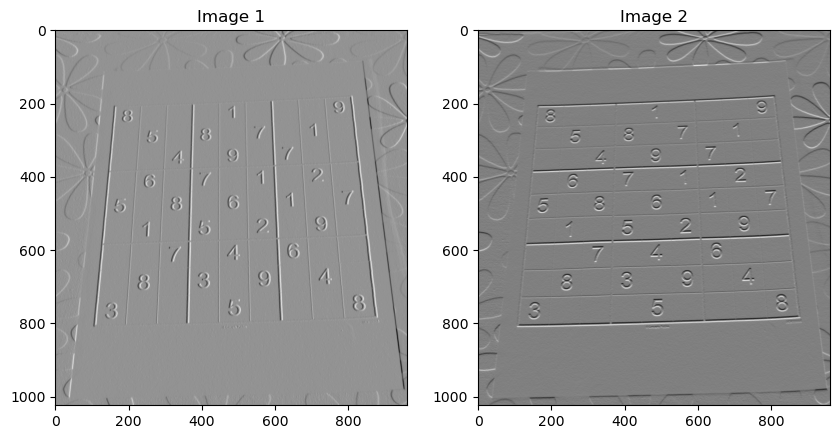

In [23]:
show_images(sobelx,sobely)

In [24]:
blended = cv2.addWeighted(src1=sobelx,alpha=0.5,src2=sobely,beta=0.5,gamma=0)

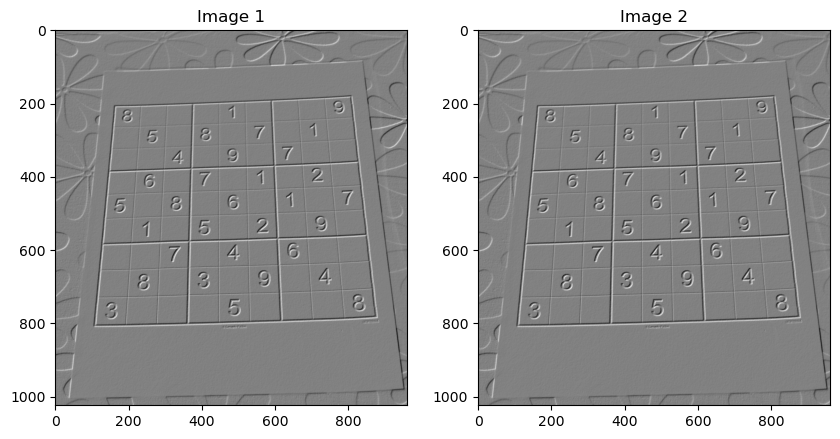

In [25]:
show_images(sobelx+sobely,blended)

In [26]:
#Morphological Operators
kernel = np.ones((4,4),np.uint8)
gradient = cv2.morphologyEx(blended,cv2.MORPH_GRADIENT,kernel)

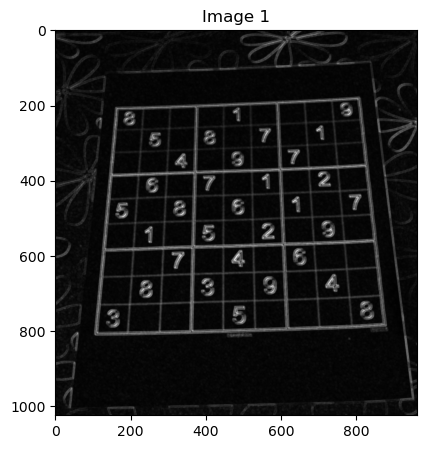

In [27]:
show_images(gradient)

In [28]:
def load_img():
    blank_img =np.zeros((600,600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img,text='ABCDE',org=(50,300), fontFace=font,fontScale= 5,color=(255,255,255),thickness=25,lineType=cv2.LINE_AA)
    return blank_img

In [29]:
img = load_img()

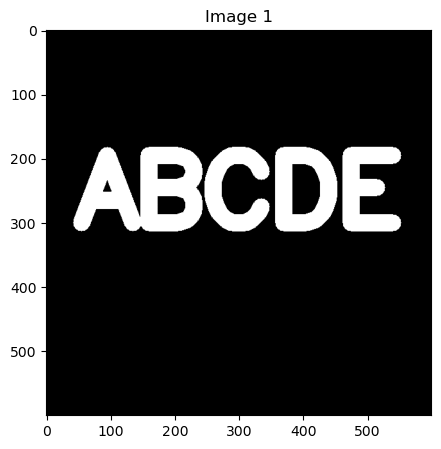

In [30]:
show_images(img)

# Erosion
Làm mỏng đường viền đối tượng. Hoạt động tốt nhất khi đối tượng màu trắng và nền đen

In [31]:
kernel = np.ones((5,5),np.uint8)
erosion2 = cv2.erode(img,kernel,iterations = 4)

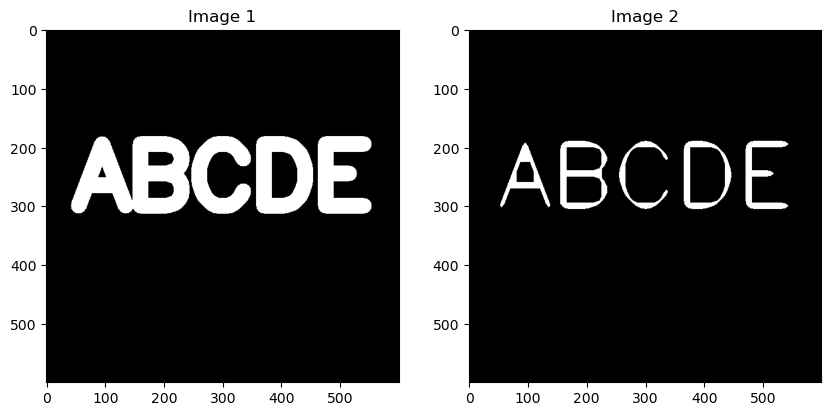

In [32]:
show_images(img, erosion2)

# Dilation 
Làm đậm chủ thể

In [33]:
dilation2 = cv2.dilate(img, kernel, iterations=2) 

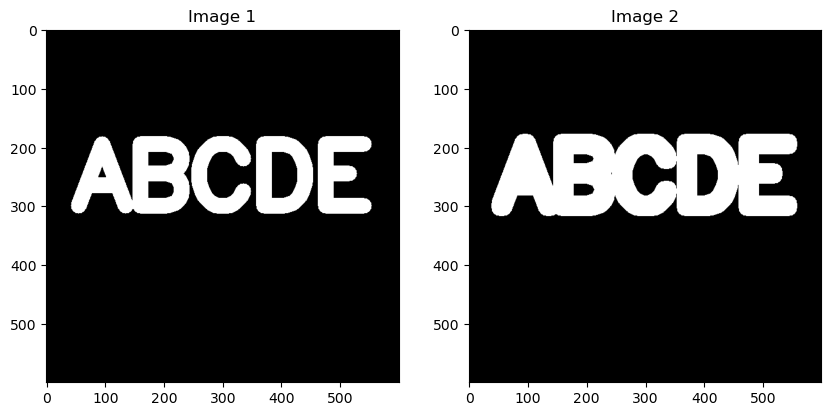

In [34]:
show_images(img,dilation2)

# Opening
Là sự thực hiện lần lượt erosion và sau đó là dilation để xóa nhiễu nền

In [35]:
white_noise = np.random.randint(low=0,high=2,size=(600,600))

In [36]:
white_noise = white_noise*255

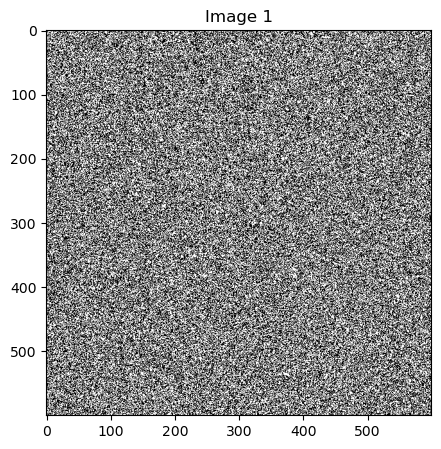

In [37]:
show_images(white_noise)

In [38]:
#Thêm nhiễu vào ảnh
noise_img = white_noise+img

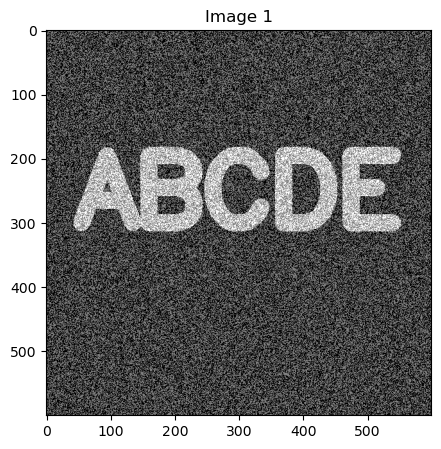

In [39]:
show_images(noise_img)

In [40]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

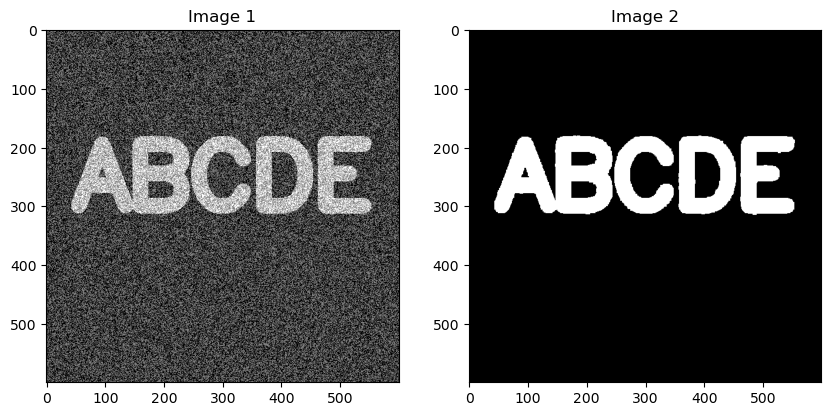

In [41]:
show_images(noise_img,opening)

# Closing
Xóa bỏ nhiễu ở trong vật thể (nhiễu đen trong văn bản)

In [42]:
black_noise = white_noise * -1 

In [43]:
black_noise

array([[-255,    0, -255, ..., -255, -255, -255],
       [   0,    0,    0, ...,    0, -255,    0],
       [   0, -255,    0, ..., -255,    0,    0],
       ...,
       [   0, -255,    0, ..., -255,    0, -255],
       [   0,    0, -255, ..., -255, -255,    0],
       [   0, -255,    0, ..., -255,    0, -255]])

In [44]:
black_noise_img = img + black_noise

In [45]:
black_noise_img[black_noise_img==-255] = 0

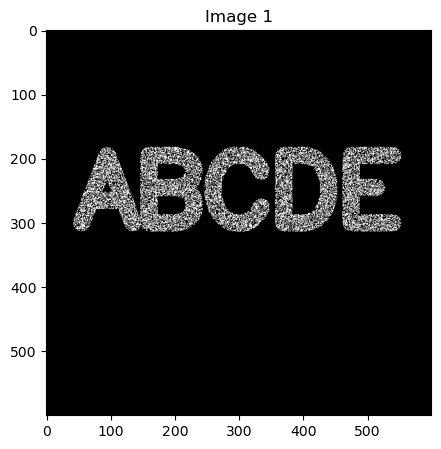

In [46]:
show_images(black_noise_img)

In [47]:
closing2 = cv2.morphologyEx(black_noise_img, cv2.MORPH_CLOSE, kernel)

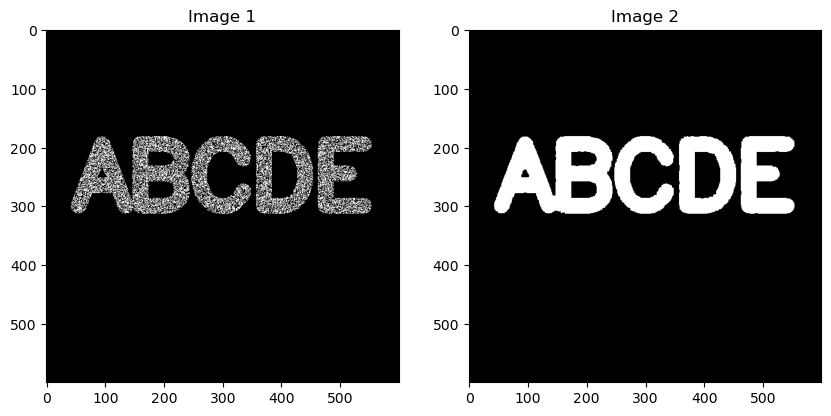

In [48]:
show_images(black_noise_img,closing2)

# Morphological Gradient
Morphological Gradient=dilation(image)−erosion(image)
Dùng để so sánh sự khác biệt khi dùng dilation và erosion

In [49]:
gradient = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

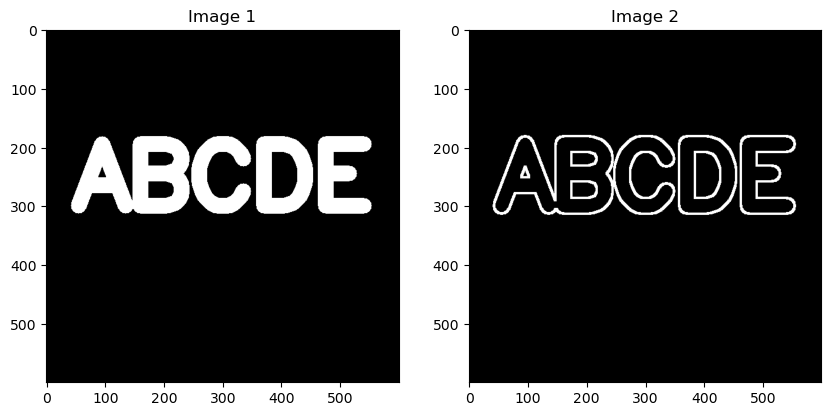

In [50]:
show_images(img,gradient)

# Bài 2

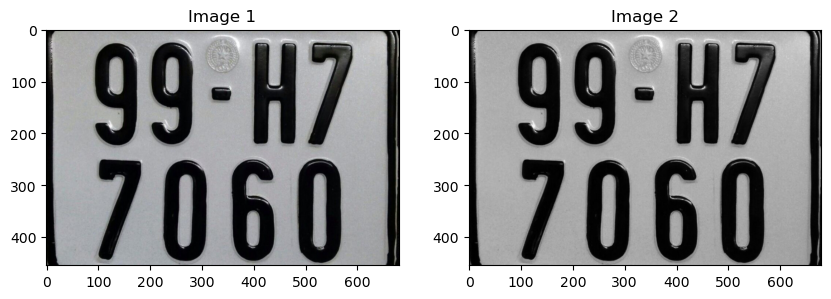

In [122]:
img6 = plt.imread("C:/Users/trand/Documents/Digital Image Processing/data/img2.jpg")

gray6 = cv2.cvtColor(img6, cv2.COLOR_RGB2GRAY)

show_images(img6,gray6)

In [148]:
#dùng opening để xóa nhiễu và tăng kích thước vật thể
opening3 = cv2.morphologyEx(gray6, cv2.MORPH_OPEN, kernel)
#Chỉ dùng phương pháp dilation3
dilation3 = cv2.dilate(gray6, kernel, iterations=2) 

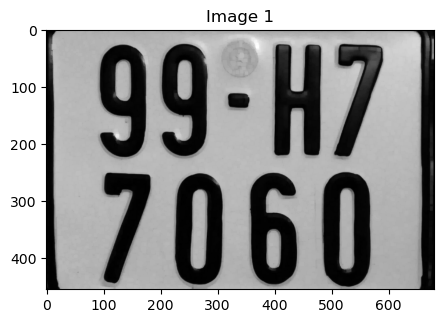

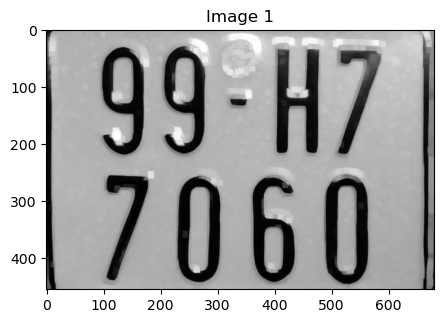

In [149]:
show_images(opening3)
show_images(dilation3)

In [150]:
#Lấy ảnh nhị phân của 2 ảnh
ret, bw_img1 = cv2.threshold(opening3, 127, 255, cv2.THRESH_BINARY) 
ret, bw_img2 = cv2.threshold(dilation3, 127, 255, cv2.THRESH_BINARY) 

In [151]:
#Dùng gradient để tách biệt rõ viền
gradient1 = cv2.morphologyEx(bw_img1,cv2.MORPH_GRADIENT,kernel)
gradient2= cv2.morphologyEx(bw_img2,cv2.MORPH_GRADIENT,kernel)

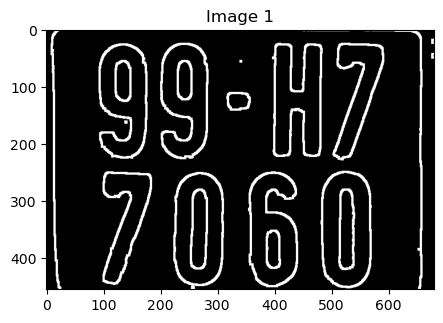

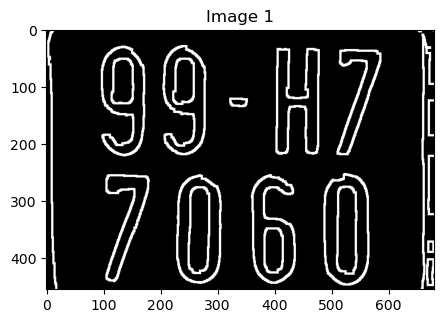

In [152]:
show_images(gradient1)
show_images(gradient2)

In [153]:
bw_img1.shape

(455, 680)

In [154]:
result1 = img6.copy()

contours, hierarchy = cv2.findContours(gradient1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
count = 0
DataDF = pd.DataFrame(columns = ["x", "y", "w", "h"])
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if(w * h > 300):
        cv2.rectangle(result1,(x,y),(x+w,y+h),(0,255,0),2) 
        DataDF.loc[count,:] = (x,y,w,h)
        count = count + 1
DataDF = DataDF.astype(int)

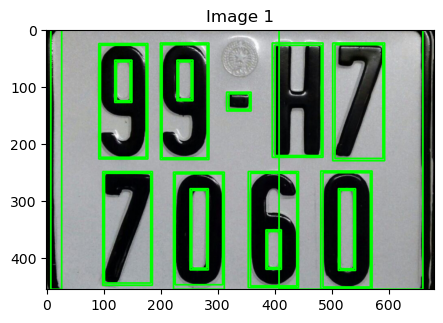

In [155]:
show_images(result1)

In [156]:
result2 = img6.copy()

contours, hierarchy = cv2.findContours(gradient2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
count = 0
DataDF = pd.DataFrame(columns = ["x", "y", "w", "h"])
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if(w * h > 300):
        cv2.rectangle(result2,(x,y),(x+w,y+h),(0,255,0),2) 
        DataDF.loc[count,:] = (x,y,w,h)
        count = count + 1
DataDF = DataDF.astype(int)

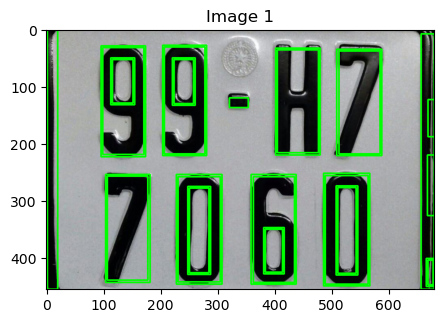

In [157]:
show_images(result2)

# Bài 3

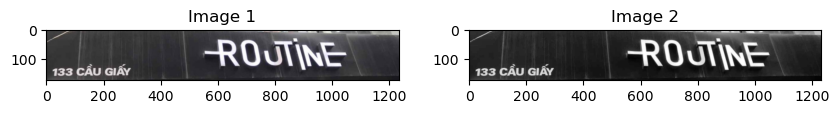

In [206]:
img7 = plt.imread("C:/Users/trand/Documents/Digital Image Processing/data/img16.jpg")

gray7 = cv2.cvtColor(img7, cv2.COLOR_RGB2GRAY)

show_images(img7,gray7)

In [207]:
thresh, image_mask = cv2.threshold(gray7,150,255,cv2.THRESH_BINARY_INV)

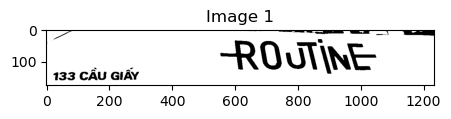

In [208]:
show_images(image_mask)

In [209]:
kernel = np.ones((3,3),np.uint8)

In [210]:
#dùng opening để xóa nhiễu và tăng kích thước vật thể
opening4 = cv2.morphologyEx(image_mask, cv2.MORPH_OPEN, kernel)
#Chỉ dùng phương pháp dilation3
dilation4_1 = cv2.dilate(image_mask, kernel, iterations=1) 
dilation4_2 = cv2.dilate(image_mask, kernel, iterations=2) 
dilation4_3 = cv2.dilate(image_mask, kernel, iterations=3) 

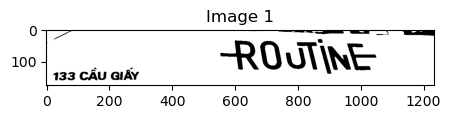

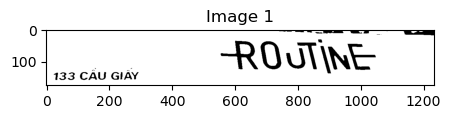

In [211]:
show_images(opening4)
show_images(dilation4_1)


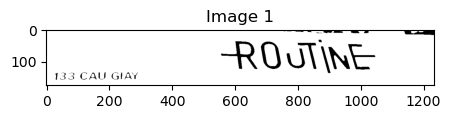

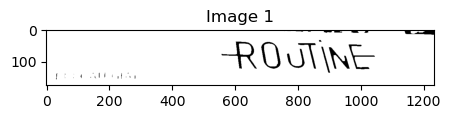

In [212]:
show_images(dilation4_2)
show_images(dilation4_3)

In [213]:
result3 = img7.copy()

contours, hierarchy = cv2.findContours(opening4,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
count = 0
DataDF = pd.DataFrame(columns = ["x", "y", "w", "h"])
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if(w * h > 300):
        cv2.rectangle(result3,(x,y),(x+w,y+h),(0,255,0),2) 
        DataDF.loc[count,:] = (x,y,w,h)
        count = count + 1
DataDF = DataDF.astype(int)

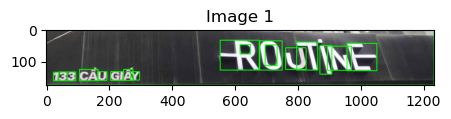

In [214]:
show_images(result3)

In [216]:
result4 = img7.copy()

contours, hierarchy = cv2.findContours(dilation4_1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
count = 0
DataDF = pd.DataFrame(columns = ["x", "y", "w", "h"])
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if(w * h > 300):
        cv2.rectangle(result4,(x,y),(x+w,y+h),(0,255,0),2) 
        DataDF.loc[count,:] = (x,y,w,h)
        count = count + 1
DataDF = DataDF.astype(int)

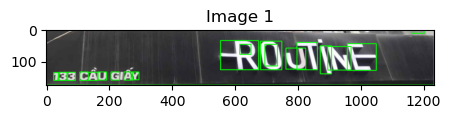

In [217]:
show_images(result4)

# Bài 4

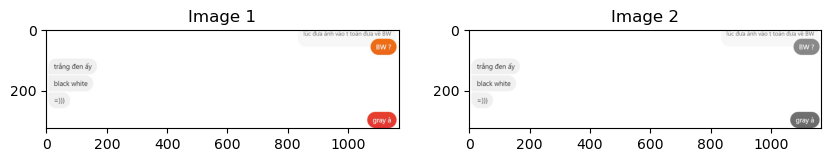

In [223]:
img8 = plt.imread("C:/Users/trand/Documents/Digital Image Processing/data/img18.jpg")

gray8 = cv2.cvtColor(img8, cv2.COLOR_RGB2GRAY)

show_images(img8,gray8)

In [224]:
thresh, image_mask = cv2.threshold(gray8,150,255,cv2.THRESH_BINARY_INV)

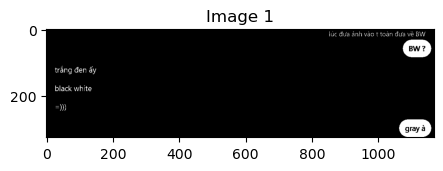

In [225]:
show_images(image_mask)

In [226]:
dilation5_1 = cv2.dilate(image_mask, kernel, iterations=1) 
dilation5_2 = cv2.dilate(image_mask, kernel, iterations=2) 
dilation5_3 = cv2.dilate(image_mask, kernel, iterations=3) 

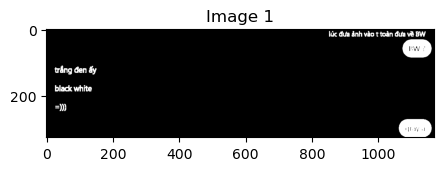

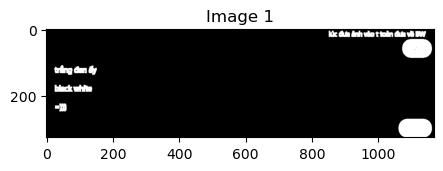

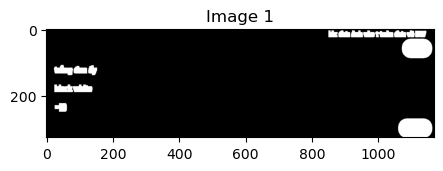

In [230]:
show_images(dilation5_1)
show_images(dilation5_2)
show_images(dilation5_3)

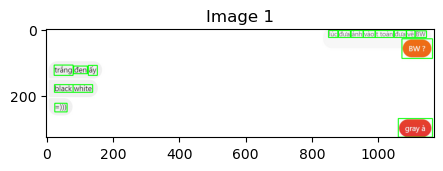

In [234]:
result4 = img8.copy()

contours, hierarchy = cv2.findContours(dilation5_3,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
count = 0
DataDF = pd.DataFrame(columns = ["x", "y", "w", "h"])
for cnt in contours:
    x,y,w,h = cv2.boundingRect(cnt)
    if(w * h > 300):
        cv2.rectangle(result4,(x,y),(x+w,y+h),(0,255,0),2) 
        DataDF.loc[count,:] = (x,y,w,h)
        count = count + 1
DataDF = DataDF.astype(int)
show_images(result4)

# Kết luận

    - Erosion:
        Mục tiêu: Giảm kích thước của đối tượng và tách biên giới.
        Hoạt động: Duyệt qua hình ảnh với một cửa sổ (kernel) nhỏ và giữ lại giá trị nhỏ nhất trong vùng đó.
        Ứng dụng: Loại bỏ nhiễu, thu nhỏ đối tượng.

    - Dilation:
        Mục tiêu: Tăng kích thước của đối tượng và nối các đối tượng gần nhau.
        Hoạt động: Duyệt qua hình ảnh với một cửa sổ (kernel) nhỏ và giữ lại giá trị lớn nhất trong vùng đó.
        Ứng dụng: Làm dày đối tượng, liên kết các đối tượng gần nhau.

    - Opening:
        Mục tiêu: Kết hợp Erosion sau Dilation để loại bỏ nhiễu và đối tượng nhỏ.
        Quy trình: Thực hiện Erosion trước, sau đó là Dilation.
        Ứng dụng: Giảm nhiễu, loại bỏ đối tượng nhỏ.

    - Closing:
        Mục tiêu: Kết hợp Dilation sau Erosion để đóng kín các khe hở và nối các đối tượng lõm.
        Quy trình: Thực hiện Dilation trước, sau đó là Erosion.
        Ứng dụng: Đóng kín các lỗ, liên kết các đối tượng lõm.
        
    - Morphological Gradient:
        Mục tiêu: Tạo ra một hình ảnh mới chỉ chứa biên giới của đối tượng.
        Hoạt động: Lấy sự chênh lệch giữa hình ảnh gốc và ảnh được erosion của nó.
        Ứng dụng: Trích xuất biên giới, phát hiện đối tượng.

# Tessera-OCR